# Time Series Analysis Exercise 1: Seattle Bicycles

In this exercise we will practice exploratory data analysis on time series data, using the Seattle [Fremont Bridge Bicycle Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k) dataset from [Seattle's Open Data portal](https://data.seattle.gov/).

This exercise requires the `statsmodels` library, available by default in Google Colab and Anaconda and which can be installed with `pip install statsmodels`. 

**Questions:**
1. Load the attached `Fremont_Bridge_Bicycle_Counter.csv` dataset as a Pandas DataFrame `bike_df`. What are the columns of this DataFrame?

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv')
df.shape

(86136, 4)

In [3]:
df.sample(5)

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
72707,01/18/2021 11:00:00 AM,149.0,77.0,72.0
8371,09/16/2013 07:00:00 PM,168.0,66.0,102.0
62971,12/09/2019 07:00:00 PM,185.0,41.0,144.0
30706,04/04/2016 10:00:00 AM,98.0,47.0,51.0
63372,12/26/2019 12:00:00 PM,55.0,25.0,30.0


2. We will only use the date and total number of bicycle crossings as our features. Use the arguments `usecols=`, `index_col=`, and `parse_dates=True` in `pd.read_csv()` so that only the `"Date"` and `"Fremont Bridge Total"` columns are read, and the dates are used as the DataFrame index.


In [4]:
df = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', usecols=['Date', 'Fremont Bridge Total'] , \
                 index_col='Date' , parse_dates=True)
df.shape

(86136, 1)

In [5]:
df.head()

,Fremont Bridge Total
Date,
2012-10-03 00:00:00,13.0
2012-10-03 01:00:00,10.0
2012-10-03 02:00:00,2.0
2012-10-03 03:00:00,5.0
2012-10-03 04:00:00,7.0


3. Run `bike_df.describe()` and give a short explanation of the statistics that are printed. Hint: What time period does each row of `bike_df` cover?


In [6]:
# your code here

In [7]:
df.describe()

,Fremont Bridge Total
count,86122.000000
mean,106.798449
std,134.926536
min,0.000000
25%,13.000000
50%,59.000000
75%,143.000000
max,1097.000000


From the df.head() I can see that the step of the Date-index is 1 hour. From this and from the database description I can state that each row shows number of bicycles crossing Fremont Bridge during one hour. From the summary statistics we can see that the minimum number of bicycles crossing the Fremont Bridge during one hour is 0 and the maximum is 1097 (that's nearly a bicycle every 3 seconds!). The average hourly number if 107 and the median in 59.

4. Plot bike crossings for the month of January 2016. What patterns do you see in the data? Hint: you can `bike_df.loc['2016-01']` to access a month in the date-time index of the DataFrame. Use the Pandas DataFrame `.plot()` function and not `plt.plot(...)` from Matplotlib.


In [8]:
# your code here

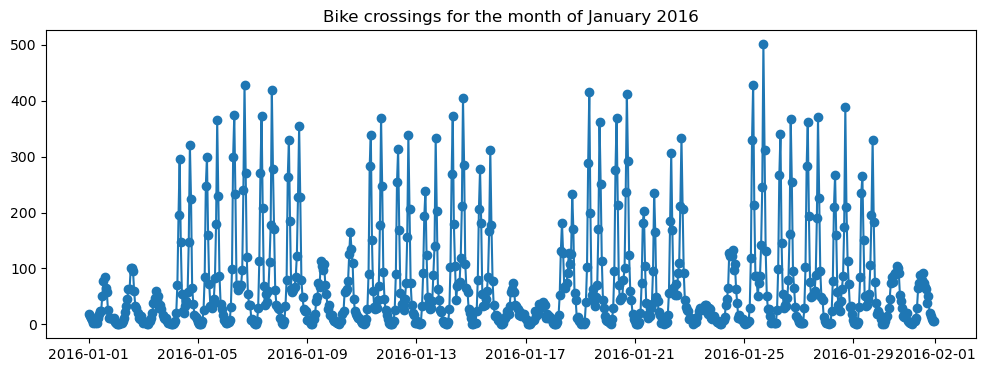

In [9]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day'] = pd.DatetimeIndex(df.index).day
df['hour'] = pd.DatetimeIndex(df.index).hour

df_jan16 = df[(df['year'] == 2016) & (df['month'] == 1)]

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(df_jan16.index, df_jan16['Fremont Bridge Total'], marker="o")
plt.title('Bike crossings for the month of January 2016')
plt.show()

5. Use `bikes_per_week = bike_df.resample(...).sum()['Fremont Bridge Total']` to get the total bike crossings per week for the entire time period covered in the dataset, and plot this data. What seasonal pattern do you see in the data?


In [10]:
# your code here# your code here

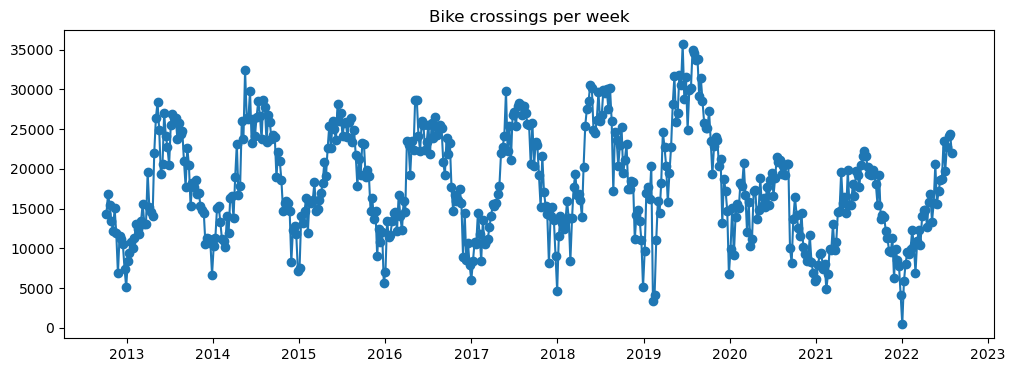

In [11]:
bikes_per_week = df.resample('W').sum()['Fremont Bridge Total']

plt.plot(bikes_per_week.index, bikes_per_week, marker="o")
plt.title('Bike crossings per week')
plt.show()

On the weekly data I see the annual cycles with minimum during winter and maximum in summer. Also a can see that the trend is affected by the lockdown, although the seasonality is still there.

6. Examine the autocorrelation plots generated below and explain them using your answers to questions 4-5.


In [12]:
# your code here

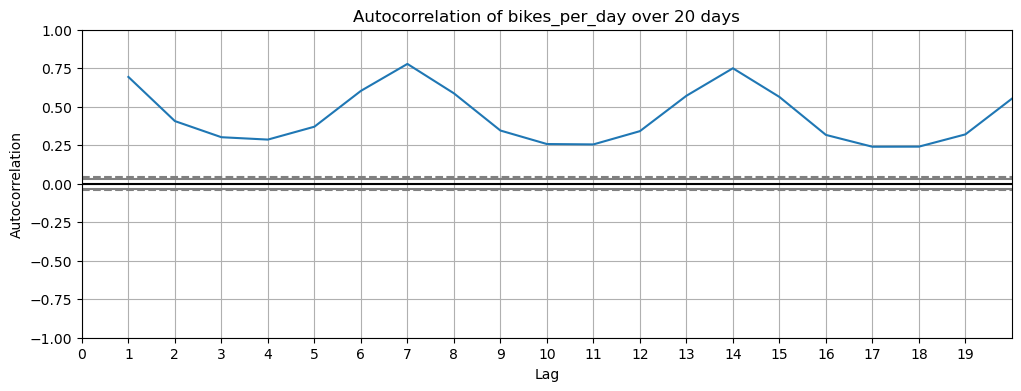

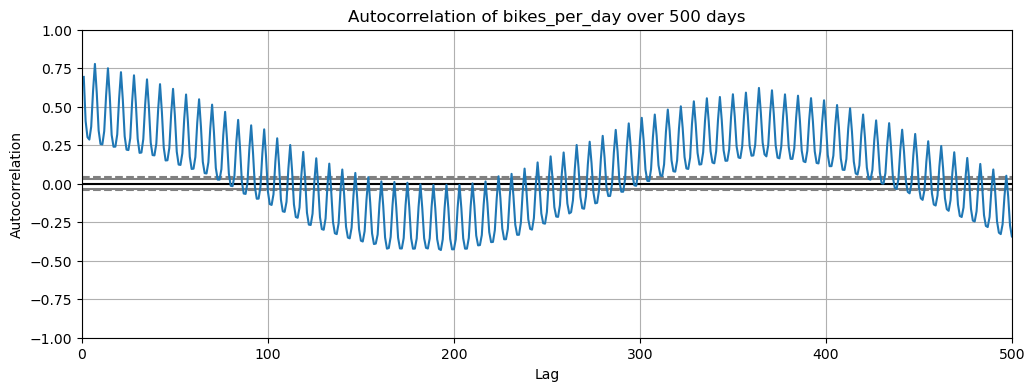

In [13]:
# code for question 6
from matplotlib import pyplot as plt

bikes_per_day = df.resample('d').sum()['Fremont Bridge Total']

plt.figure()
pd.plotting.autocorrelation_plot(bikes_per_day)
plt.xlim((0, 20))
plt.ylim((-1, 1))
plt.xticks(range(20))
plt.title('Autocorrelation of bikes_per_day over 20 days')

plt.figure()
pd.plotting.autocorrelation_plot(bikes_per_day)
plt.xlim((0,500))
plt.ylim((-1, 1))
plt.title('Autocorrelation of bikes_per_day over 500 days');

When we look at Autocorrelation of daily data over 20 days period, we see clear weekly cycles (correlation peaks at 7, 14, (21?))

On the  Autocorrelation of daily data over 500 days period we can see how weekly cycles are overlap with annual cycles.

7. Use `statsmodels.tsa.seasonal.seasonal_decompose()` on `bikes_per_week` to decompose it into seasonal, trend, and residual components. Plot all of these components on the same graph, and explain what each component represents. What can you say about how the number of bicycle crossings have changed over time?


In [14]:
# your code here

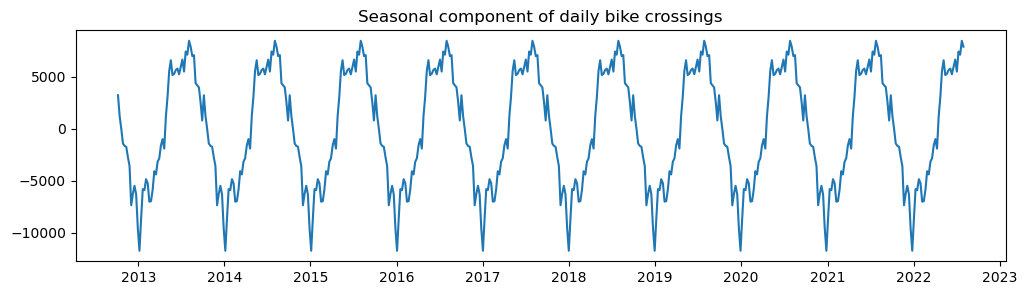

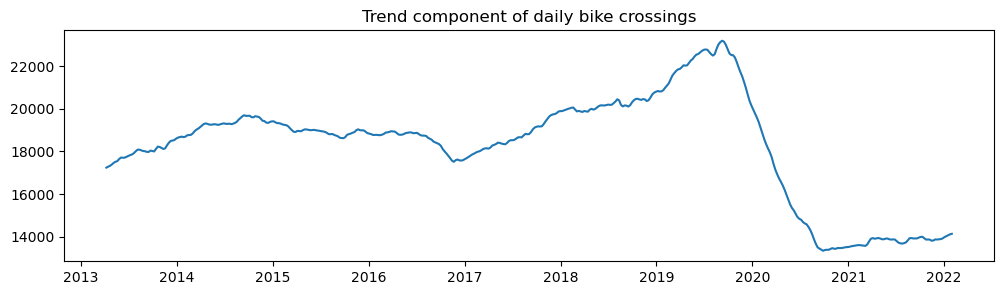

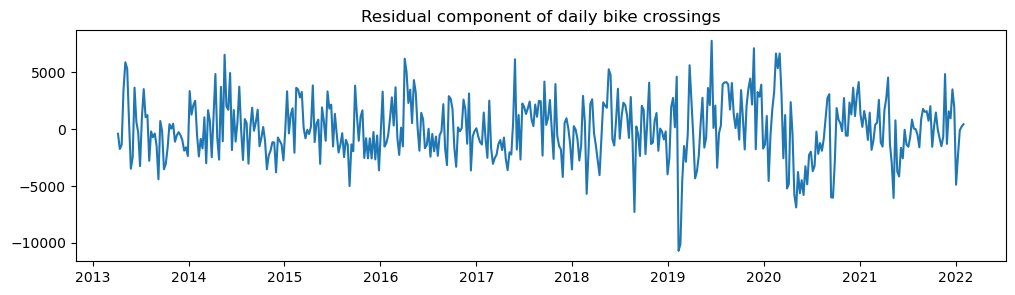

In [15]:
result = seasonal_decompose(bikes_per_week)

plt.rcParams["figure.figsize"] = (12,3)
plt.figure()
plt.plot(bikes_per_week.index, result.seasonal)
plt.title('Seasonal component of daily bike crossings')

plt.figure()
plt.plot(bikes_per_week.index, result.trend)
plt.title('Trend component of daily bike crossings')

plt.figure()
plt.plot(bikes_per_week.index, result.resid)
plt.title('Residual component of daily bike crossings')
plt.show()

On the seasonal plot we can clearly see annual cycle

On the trend plot we see more or less stable annual values up to 2017, than the growth up to 2020 and than decline to the unseen before levels.

And the residual component is just the noise (e.g. due to specific weather conditions)

**BONUS:** Describe the meaning of the graph generated by the code below marked BONUS.

In [16]:
# your code here

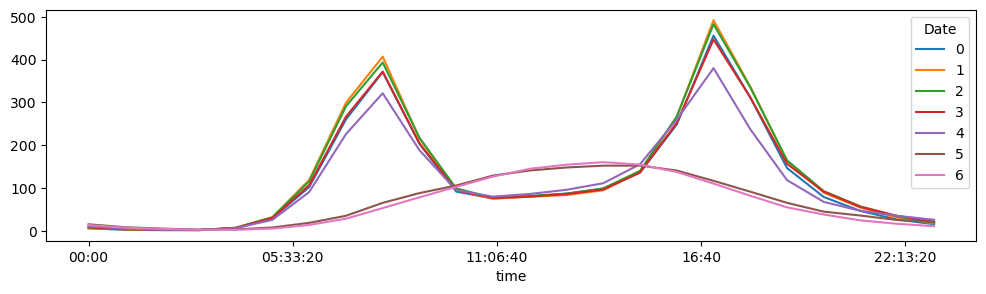

In [17]:
# code for BONUS question
df['Fremont Bridge Total'].groupby([
    df.index.time,
    df.index.dayofweek
]).mean().unstack().plot();

I think it's a hiding cat!

Well, on second thought, we can see the hourly dinamics splitted by days of the week. So, the "cat ears" are the rush hours on the business days, when people are cycling to and from work. And the "cat head" are lazy mid-day's commute on the weekend. 